In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, interp1d, CubicSpline, PchipInterpolator
#display Chinese in figures
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [14]:
# 定义 R(x) 函数
def R(x):
    return 1 / (1 + x**2)

# 定义节点
n_lagrange = 21
n_newton = 11
x_lagrange = [5 * np.cos((2 * i + 1) / (42) * np.pi) for i in range(n_lagrange)]
x_newton = [-5 + i for i in range(n_newton)]

In [15]:
# 定义 Lagrange 插值多项式
def lagrange_interpolation(x, x_nodes, y_nodes):
    poly = lagrange(x_nodes, y_nodes)
    return poly(x)

In [16]:
# 定义 Newton 插值多项式
def newton_interpolation(x, x_nodes, y_nodes):
    poly = lagrange(x_nodes, y_nodes)
    return poly(x)

In [17]:
# 计算插值多项式的值
x_values = np.linspace(-5, 5, 2001)
lagrange_values = lagrange_interpolation(x_values, x_lagrange, R(np.array(x_lagrange)))
newton_values = newton_interpolation(x_values, x_newton, R(np.array(x_newton)))

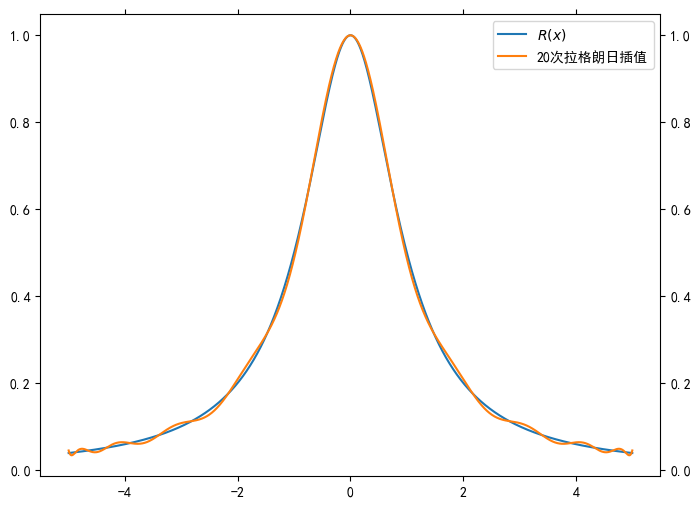

In [18]:
# 20次Lagrange插值多项式的图像
plt.figure(figsize=(8,6))
plt.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True,labelright=True)
plt.plot(x_values, R(x_values), label='$R(x)$')
plt.plot(x_values, lagrange_values, label='20次拉格朗日插值')
plt.legend(loc='upper right')

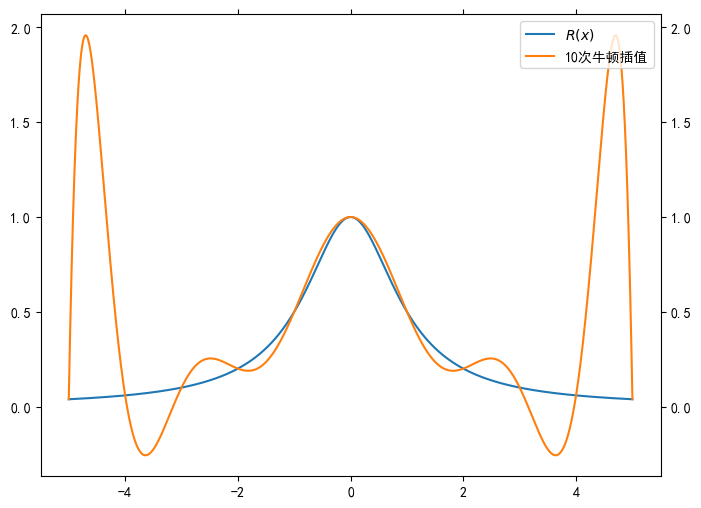

In [19]:
# 10次Newton插值多项式的图像
plt.figure(figsize=(8,6))
plt.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True,labelright=True)
plt.plot(x_values, R(x_values), label='$R(x)$')
plt.plot(x_values, newton_values, label='10次牛顿插值')
plt.legend(loc='upper right')

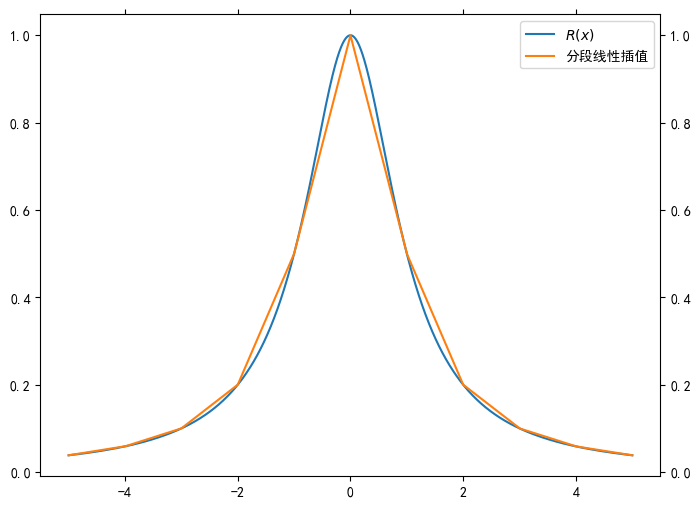

In [20]:
# 分段线性插值函数的图像
plt.figure(figsize=(8,6))
plt.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True,labelright=True)
linear_interp = interp1d(x_newton, R(np.array(x_newton)), kind='linear', fill_value="extrapolate")
plt.plot(x_values, R(x_values), label='$R(x)$')
plt.plot(x_values, linear_interp(x_values), label='分段线性插值')
plt.legend(loc='upper right')

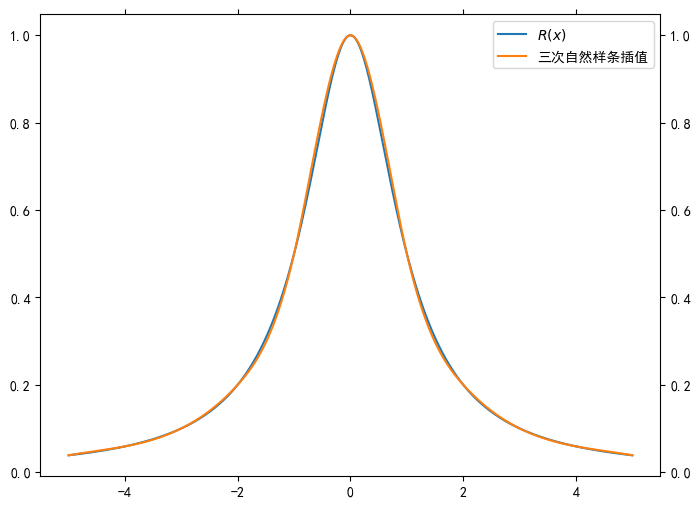

In [21]:
# 三次自然样条插值函数的图像
plt.figure(figsize=(8,6))
plt.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True,labelright=True)
cubic_spline = CubicSpline(x_newton, R(np.array(x_newton)))
plt.plot(x_values, R(x_values), label='$R(x)$')
plt.plot(x_values, cubic_spline(x_values), label='三次自然样条插值')
plt.legend(loc='upper right')

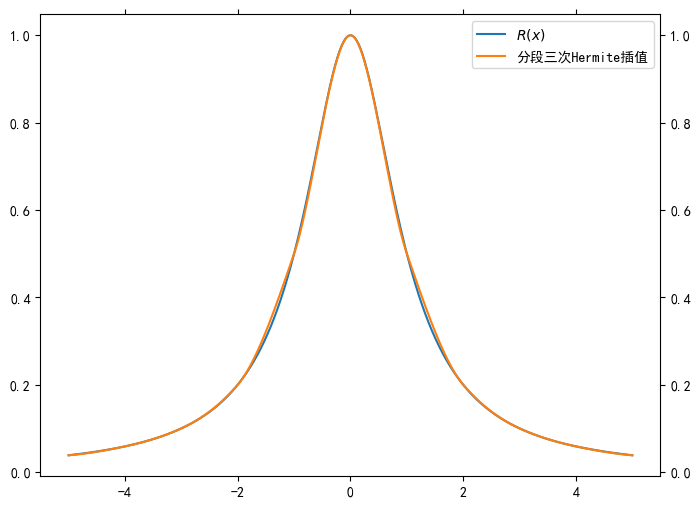

In [22]:
# 分段三次Hermite插值函数的图像
plt.figure(figsize=(8,6))
plt.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True,labelright=True)
pchip_interp = PchipInterpolator(x_newton, R(np.array(x_newton)))
plt.plot(x_values, R(x_values), label='$R(x)$')
plt.plot(x_values, pchip_interp(x_values), label='分段三次Hermite插值')
plt.legend(loc='upper right')

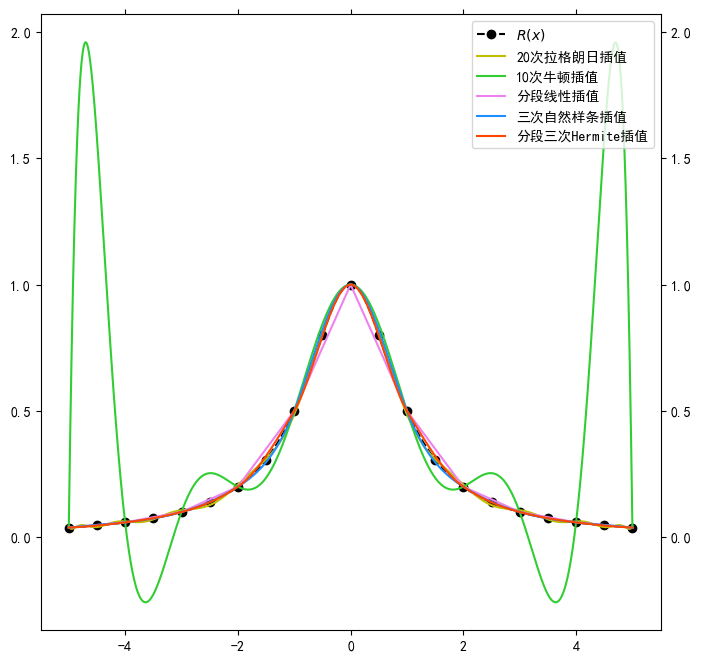

In [23]:
# plot all curves in one gragh
plt.figure(figsize=(8,8))
plt.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True,labelright=True)
plt.plot(x_values, R(x_values), label='$R(x)$', linestyle='--',color='black',marker="o", markeredgecolor='black', markerfacecolor='black', markevery=100)
plt.plot(x_values, lagrange_values, label='20次拉格朗日插值', color='y')
plt.plot(x_values, newton_values, label='10次牛顿插值', color='limegreen')
plt.plot(x_values, linear_interp(x_values), label='分段线性插值', color='violet')
plt.plot(x_values, cubic_spline(x_values), label='三次自然样条插值', color='dodgerblue')
plt.plot(x_values, pchip_interp(x_values), label='分段三次Hermite插值', color='orangered')
plt.legend(loc='upper right')

三次样条插值的平均误差为0.004307669167328602
分段Hermite插值的平均误差为0.0029228974146277144


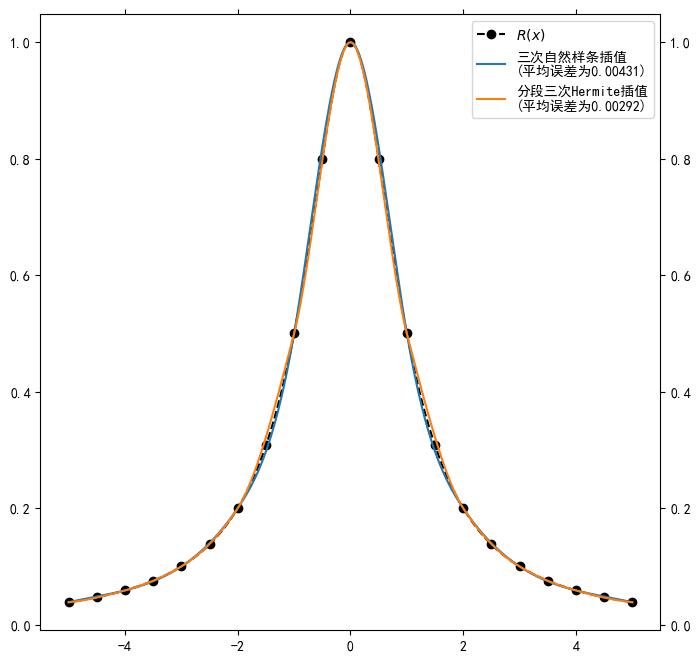

In [24]:
plt.figure(figsize=(8,8))
plt.tick_params(axis='both', which='both', bottom=True, top=True, left=True, right=True,labelright=True)
plt.plot(x_values, R(x_values), label='$R(x)$', linestyle='--',color='black',marker="o", markeredgecolor='black', markerfacecolor='black', markevery=100)
plt.plot(x_values, cubic_spline(x_values), label='三次自然样条插值\n(平均误差为0.00431)')
plt.plot(x_values, pchip_interp(x_values), label='分段三次Hermite插值\n(平均误差为0.00292)')
plt.legend(loc='upper right')
r1=(np.sum((np.abs(R(x_values)-cubic_spline(x_values)))))/2000
r2=(np.sum((np.abs(R(x_values)-pchip_interp(x_values)))))/2000
print(f'三次样条插值的平均误差为{r1}')
print(f'分段Hermite插值的平均误差为{r2}')